In [1]:
import pandas as pd
df_train=pd.read_csv('Dataset/RNN/tweets_train.csv')
df_train.head(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative
5,Mike Toohey,NaN,stand up comic. I treat Twitter like a good fr...,2011-11-29 19:38:12,146,321,1315,False,2020-09-14 18:25:39,['TheSocialDilemma'],Twitter for iPhone,False,Wait so you mean to tell me this phone is cons...,Negative
6,Ekta :),India ❤,Workaholic🙊IMTian👩‍🎓 Former Intern at Tata Ste...,2012-10-21 11:15:31,296,97,15812,False,2020-09-17 19:29:24,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma Let s see how it can...,Neutral
7,FJRamosArt,"Los Angeles, CA","Creativity is bliss... 🎨🖥🎸🎬🎶 Artist, Musician,...",2011-11-24 05:05:50,33,89,4119,False,2020-09-14 00:33:14,NaN,Twitter for iPhone,False,The Social Dilemma is an eye opening Netflix d...,Positive
8,elleghie16😇🍀,Republic of the Philippines,do your Best and God will do the rest🙏🙏🙏,2018-12-02 17:19:12,253,3885,9968,False,2020-09-14 16:50:47,['TheSocialDilemma'],Twitter for Android,False,There are only two industries that call their ...,Negative
9,jérôme boothang,USA,"Teacher/Recovering Chef tweeting about sports,...",2011-02-10 19:02:59,910,1483,30319,False,2020-09-17 23:38:26,['TheSocialDilemma'],Twitter for iPhone,False,I have nothing to say about TheSocialDilemma t...,Negative


In [2]:
df_train['is_retweet'].value_counts()

False    17000
Name: is_retweet, dtype: int64

In [3]:
df_train.drop('is_retweet',axis=1,inplace=True)

In [4]:
df_train.shape

(17000, 13)

In [5]:
data=df_train[['clean_text','Sentiment']]

In [6]:
data.head(10)

,clean_text,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TheSocialDilemma If we don t agree on what is ...,Positive
2,Watching TheSocialDilemma scary to see social ...,Negative
3,You check your social media before you pee in ...,Positive
4,watch thesocialdilemma and see what s actually...,Negative
5,Wait so you mean to tell me this phone is cons...,Negative
6,Watching TheSocialDilemma Let s see how it can...,Neutral
7,The Social Dilemma is an eye opening Netflix d...,Positive
8,There are only two industries that call their ...,Negative
9,I have nothing to say about TheSocialDilemma t...,Negative


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sentiment_num']=le.fit_transform(data['Sentiment'])
data.head(10)

c:\Users\sumit\Desktop\Dataset\.conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,clean_text,Sentiment,Sentiment_num
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral,1
1,TheSocialDilemma If we don t agree on what is ...,Positive,2
2,Watching TheSocialDilemma scary to see social ...,Negative,0
3,You check your social media before you pee in ...,Positive,2
4,watch thesocialdilemma and see what s actually...,Negative,0
5,Wait so you mean to tell me this phone is cons...,Negative,0
6,Watching TheSocialDilemma Let s see how it can...,Neutral,1
7,The Social Dilemma is an eye opening Netflix d...,Positive,2
8,There are only two industries that call their ...,Negative,0
9,I have nothing to say about TheSocialDilemma t...,Negative,0


In [8]:
data['Sentiment_num'].value_counts()

2    8059
1    5927
0    3014
Name: Sentiment_num, dtype: int64

In [9]:
#baaencing the dataset
min_samples=3014
df_positive=data[data.Sentiment=='Positive'].sample(min_samples, random_state=2022)
df_neutral= data[data.Sentiment=='Neutral'].sample(min_samples,random_state=2022)
df_negative= data[data.Sentiment=='Negative'].sample(min_samples,random_state=2022)
df_balanced = pd.concat([df_positive,df_neutral,df_negative],axis=0)
df_balanced.Sentiment.value_counts()

Positive    3014
Neutral     3014
Negative    3014
Name: Sentiment, dtype: int64

In [10]:
x=df_balanced['clean_text']
y=df_balanced['Sentiment_num']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2022,stratify=df_balanced.Sentiment_num)

print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

print('Length of text: {} characters'.format(x_train.str.len().max()))  # Calculate length of string using str.len()
print("Max tweet length:", x_train.str.len().max())
print("Min tweet length:", x_train.str.len().min())
print("Average tweet length:", x_train.str.len().mean())

X_train shape: (7233,)
y_train shape: (7233,)
X_test shape: (1809,)
y_test shape: (1809,)
Length of text: 139.0 characters
Max tweet length: 139.0
Min tweet length: 6.0
Average tweet length: 90.30835176991151


## attempt 1

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

tweets = df_balanced['clean_text'].astype(str)
sentiments = df_balanced['Sentiment_num']
# Tokenize the tweets
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(tweets)

# Pad sequences to ensure uniform length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentiments, test_size=0.2, random_state=42)

# Define the RNN model
rnn = Sequential([
    Embedding(vocab_size, 16, input_length=max_length),
    SimpleRNN(32),
    Dense(3, activation='softmax')  # 3 categories: positive, negative, neutral
])

# Compile the model
rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
his=rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, accuracy = rnn.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
181/181 [==============================] - 3s 7ms/step - loss: 0.9800 - accuracy: 0.5024 - val_loss: 0.9154 - val_accuracy: 0.5632
Epoch 2/10
181/181 [==============================] - 1s 6ms/step - loss: 0.5948 - accuracy: 0.7705 - val_loss: 0.6900 - val_accuracy: 0.7215
Epoch 3/10
181/181 [==============================] - 1s 6ms/step - loss: 0.2863 - accuracy: 0.9055 - val_loss: 0.7686 - val_accuracy: 0.7270
Epoch 4/10
181/181 [==============================] - 1s 7ms/step - loss: 0.1585 - accuracy: 0.9525 - val_loss: 0.8191 - val_accuracy: 0.7215
Epoch 5/10
181/181 [==============================] - 1s 7ms/step - loss: 0.1039 - accuracy: 0.9718 - val_loss: 0.8640 - val_accuracy: 0.7505
Epoch 6/10
181/181 [==============================] - 1s 6ms/step - loss: 0.0668 - accuracy: 0.9824 - val_loss: 0.8671 - val_accuracy: 0.7353
Epoch 7/10
181/181 [==============================] - 1s 6ms/step - loss: 0.0469 - accuracy: 0.9901 - val_loss: 0.9172 - val_accuracy: 0.7450
Epoch 

## attempt 2

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, GlobalAveragePooling1D  # Import GlobalAveragePooling1D
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(seq) for seq in sequences)
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(32, return_sequences=True),
    GlobalAveragePooling1D(),  
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
181/181 [==============================] - 4s 13ms/step - loss: 0.9110 - accuracy: 0.5299 - val_loss: 0.7899 - val_accuracy: 0.5847
Epoch 2/10
181/181 [==============================] - 2s 12ms/step - loss: 0.5568 - accuracy: 0.7518 - val_loss: 0.7160 - val_accuracy: 0.7021
Epoch 3/10
181/181 [==============================] - 2s 12ms/step - loss: 0.2520 - accuracy: 0.9122 - val_loss: 0.6030 - val_accuracy: 0.7851
Epoch 4/10
181/181 [==============================] - 2s 12ms/step - loss: 0.1299 - accuracy: 0.9578 - val_loss: 0.6572 - val_accuracy: 0.8079
Epoch 5/10
181/181 [==============================] - 2s 13ms/step - loss: 0.0866 - accuracy: 0.9734 - val_loss: 0.7526 - val_accuracy: 0.8079
Epoch 6/10
181/181 [==============================] - 2s 13ms/step - loss: 0.0617 - accuracy: 0.9794 - val_loss: 0.7751 - val_accuracy: 0.8086
Epoch 7/10
181/181 [==============================] - 2s 14ms/step - loss: 0.0602 - accuracy: 0.9801 - val_loss: 0.7276 - val_accuracy: 0.8169

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

 1/57 [..............................] - ETA: 1s - loss: 1.5603 - accuracy: 0.7188

57/57 [==============================] - 0s 5ms/step - loss: 0.9108 - accuracy: 0.8170
Test Loss: 0.9108335971832275, Test Accuracy: 0.8170259594917297


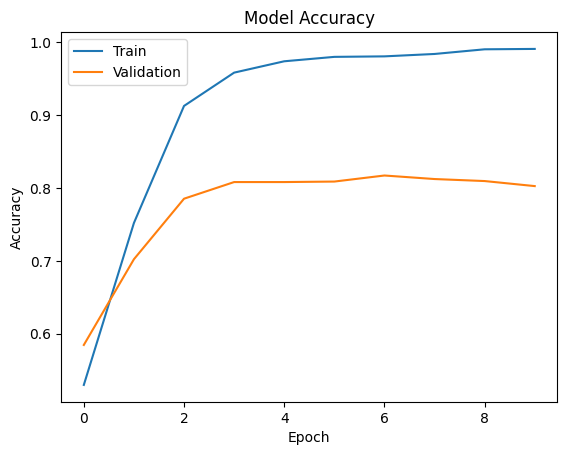

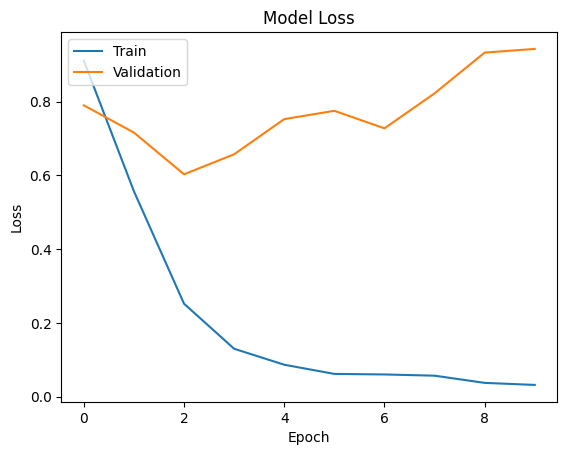

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

test_df = pd.read_csv('Dataset/RNN/tweets_test.csv')

test_df.dropna(subset=['clean_text'], inplace=True)

test_clean_text = test_df['clean_text']

test_sequences = tokenizer.texts_to_sequences(test_clean_text)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

predictions = model.predict(test_padded)

predicted_labels = [int(round(pred.argmax())) for pred in predictions]

test_df['prediction'] = predicted_labels
test_df[['clean_text', 'prediction']]

96/96 [==============================] - 0s 3ms/step


,clean_text,prediction
0,Watch theSocialDilemma then joinMastodon,1
1,With the 2019 2020 NBA season officially over ...,1
2,if you want to really know about people go tal...,2
3,Have you watched TheSocialDilemma on Netflix,1
4,Highly recommend TheSocialDilemma on,2
...,...,...
3063,Everybody should watch TheSocialDilemma,1
3064,Enjoyed TheSocialDilemma Then read this,2
3065,Couldn t stop thinking about docu TheSocialDil...,1
3066,This was the best one by on TheSocialDilemma on,2
